<a href="https://colab.research.google.com/github/easyforitall/NLP-spam-detection-with-ML-Model-with-deployment/blob/main/NLP_SPAM_DETECTION_WITH_DEPLOYMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_excel("/content/sample_data/Spamcollection.xlsx")
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
data.duplicated().sum()

403

In [ ]:
data[data.duplicated()]

,label,message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(5169, 2)

In [ ]:
data["label"].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

In [7]:
# checking for imbalance percentage
target_count = data["label"].value_counts()
print('Proportion of ham is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
print('Proportion of spam is ', round(target_count[1] * 100 / (target_count[1] + target_count[0]), 2),'%')

Proportion of ham is  86.59 %
Proportion of spam is  13.41 %


NOTE : FROM ABOVE CALCULATION THERE WAS MORE THA 70% IMBALANCE IN DATA SO PROCEDDING OVERSAMPLING TECHNIQUES TO OVERCOME THE IMBALANCE

In [ ]:
# smothe technique
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
count_class_ham,count_class_spam = data["label"].value_counts()
data_class_ham = data[data["label"]=="ham"]
data_class_spam = data[data["label"]=="spam"]
data_class_spam_over = data_class_spam.sample(count_class_ham,replace=True)
data_test_over = pd.concat([data_class_ham,data_class_spam_over],axis=0)
data_test_over["label"].value_counts()

ham     4825
spam    4825
Name: label, dtype: int64

NOTE : NOW THE DATA WAS BALANCED

In [9]:
# Now Preprocess of message feature will start
data_test_over["message"].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: message, dtype: object

In [43]:
import nltk
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

PREPROCESSING TECHNIQUES

In [44]:
# Coverting to lower case
def lower(text):
  word = [i.lower() for i in text.split()]
  return " ".join(word)

In [45]:
data_test_over["message"] = data_test_over["message"].apply(lambda x : lower(x))

In [59]:
data_test_over.head()

,label,message
0,ham,"[go, jurong, point, ,, crazy, .., available, b..."
1,ham,"[ok, lar, ..., joking, wif, oni, ...]"
3,ham,"[dun, say, early, hor, ..., already, say, ...]"
4,ham,"[nah, think, go, usf, ,, life, around, though]"
6,ham,"[even, brother, like, speak, me, ., treat, lik..."


In [77]:
data_test_over["message"] = data_test_over["message"].apply(lambda x : nltk.word_tokenize(x))

In [19]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [72]:
#Removing of punctuation or special characters
from nltk.tokenize import RegexpTokenizer
import string
string_punctuation =["..","...","...."]
#string.punctuation
def puntuation_remo(text):
  tokenizer = [c for c in text if c not in string.punctuation and c not in string_punctuation]
  return tokenizer

In [71]:
import string
text = data_test_over["message"][0]
tokenizer = [c for c in text if c not in string.punctuation and c not in string_punctuation]
print(tokenizer)

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'la', 'buffet', 'cine', 'got', 'amore', 'wat']


In [73]:
data_test_over["message"] = data_test_over["message"].apply(lambda x : puntuation_remo(x))

In [74]:
data_test_over.head()

,label,message
0,ham,"[go, jurong, point, crazy, available, bugis, g..."
1,ham,"[ok, lar, joking, wif, oni]"
3,ham,"[dun, say, early, hor, already, say]"
4,ham,"[nah, think, go, usf, life, around, though]"
6,ham,"[even, brother, like, speak, me, treat, like, ..."


In [49]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [75]:
# removing of stop words
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
def stop_word_lematize(text):
  without_stop_words = [lemmatizer.lemmatize(word) for word in text if not word in stop_words]
  return " ".join(without_stop_words)

In [76]:
data_test_over["message"] = data_test_over["message"].apply(lambda x : stop_word_lematize(x))

In [78]:
# Removing single characters
def remove_single(text):
  single =  [word for word in text if len(word)>=2]
  return single

In [79]:
data_test_over["message"] = data_test_over["message"].apply(lambda x : remove_single(x))

In [80]:
#removing extrawhite space
def extra_whitespace(text):
  single =  [word.strip() for word in text]
  return " ".join(single)

In [81]:
data_test_over["message"] = data_test_over["message"].apply(lambda x : extra_whitespace(x))

In [82]:
data_test_over["message"].head()

0    go jurong point crazy available bugis great wo...
1                                ok lar joking wif oni
3                        dun say early hor already say
4                  nah think go usf life around though
6        even brother like speak treat like aid patent
Name: message, dtype: object

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [117]:
data_test_over["message"][4]

'nah think go usf life around though'

In [139]:
data_test_over.to_excel("cleaned file.xlsx",index=False)

In [192]:
data_test_over.isnull().sum()

label      0
message    0
dtype: int64

In [142]:
a = pd.read_excel("cleaned file.xlsx")
a.head()

,label,message
0,ham,go jurong point crazy available bugis great wo...
1,ham,ok lar joking wif oni
2,ham,dun say early hor already say
3,ham,nah think go usf life around though
4,ham,even brother like speak treat like aid patent


In [206]:
a.dropna(inplace=True,axis=0)

In [207]:
a.isnull().sum()

label      0
message    0
dtype: int64

In [197]:
a['label'].value_counts()

spam    4825
ham     4815
Name: label, dtype: int64

VECTORIZATION

->THERE ARE FOUR TYPES FOR VECTORIZATION ONE IS BOW,BONGRAMS,TF-IDF VECTORIZATION , WORDEMBEDDINGS

NAVIE BAYES

In [87]:
# BOW ->count Vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
count_vectorizer = CountVectorizer().fit(data_test_over["message"])
print(len(count_vectorizer.vocabulary_))
print(count_vectorizer.get_feature_names())
bag_of_words = count_vectorizer.transform(data_test_over["message"])
print(bag_of_words.shape)
print(bag_of_words.nnz)

8145
['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [103]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, data_test_over["label"], test_size=0.2, random_state=42)
spam_detect_model = MultinomialNB().fit(X_train,y_train) 
y_predict = spam_detect_model.predict(X_test)
y_predict

array(['ham', 'ham', 'ham', ..., 'spam', 'spam', 'ham'], dtype='<U4')

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))
# using bag of words the accuracy f1-score was high

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       985
        spam       0.98      0.98      0.98       945

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



[[964  21]
 [ 18 927]]
The model accuracy is 0.9797927461139896


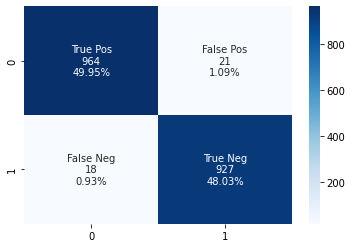

In [105]:
# Accuracy score and auroc score
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_predict)
cm = confusion_matrix(y_test, y_predict)
print(cm)
print("The model accuracy is", accuracy)
#It has high accuray score
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [106]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, spam_detect_model.predict_proba(X_test)[:,1]))

0.9959519780839579


KNN 

In [107]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier().fit(X_train,y_train) 
y_predict = Knn.predict(X_test)
y_predict

array(['ham', 'ham', 'ham', ..., 'spam', 'spam', 'ham'], dtype=object)

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       985
        spam       1.00      0.97      0.98       945

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



[[984   1]
 [ 32 913]]
The model accuracy is 0.9829015544041451


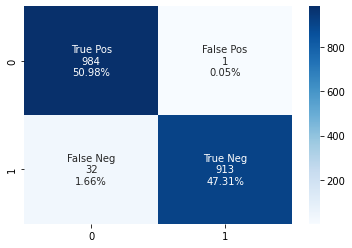

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_predict)
cm = confusion_matrix(y_test, y_predict)
print(cm)
print("The model accuracy is", accuracy)
#It has high accuray score
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [110]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, Knn.predict_proba(X_test)[:,1]))

0.9993650793650792


RANDOMFORESTCLASSIFIER

In [111]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier().fit(X_train,y_train) 
y_predict = RFC.predict(X_test)
y_predict

array(['ham', 'ham', 'ham', ..., 'spam', 'spam', 'ham'], dtype=object)

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       985
        spam       1.00      1.00      1.00       945

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



[[985   0]
 [  0 945]]
The model accuracy is 1.0


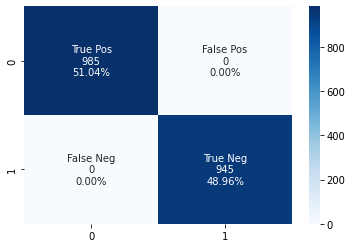

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_predict)
cm = confusion_matrix(y_test, y_predict)
print(cm)
print("The model accuracy is", accuracy)
#It has high accuray score
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [114]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, RFC.predict_proba(X_test)[:,1]))

1.0


#CREATING A DATAFRAME FOR ALL THREE MODELS FOR BAG OF WORDS VECTORIZATION WITH THEIR F1-SCORE, ACCURACY, AUROC_SCORE

In [115]:
data = pd.DataFrame(columns=["model","f1_score","accuracy","auroc_score"])
data = data.append({"model":"Naive Bayes","f1_score":0.98,"accuracy":0.9797927461139896,"auroc_score":0.9959519780839579},ignore_index=True)
data = data.append({"model":"Knn","f1_score":0.98,"accuracy":0.9829015544041451,"auroc_score":0.9993650793650792},ignore_index=True)
data = data.append({"model":"Randomforestclassifier","f1_score":1.00,"accuracy":1.0,"auroc_score":1.0},ignore_index=True)
data.head()

,model,f1_score,accuracy,auroc_score
0,Naive Bayes,0.98,0.979793,0.995952
1,Knn,0.98,0.982902,0.999365
2,Randomforestclassifier,1.00,1.000000,1.000000


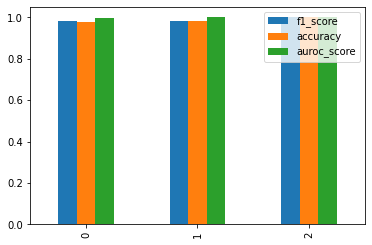

In [116]:
data.plot(kind="bar")

DEPLOYMENT USING STREAMLIT

In [276]:
%%writefile app.py
import streamlit as st 
import pandas as pd
import numpy as np
import nltk 
import spacy
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
a = pd.read_excel("cleaned file.xlsx")
a.dropna(axis=0,inplace=True)
print(a.isnull().sum())
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(a["message"])
y = a["label"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)
def preprocess(text):
  import string
  string_punctuation =["..","...","...."]
  from nltk.stem.wordnet import WordNetLemmatizer
  lemmatizer = WordNetLemmatizer()
  from nltk.corpus import stopwords
  stop_words = set(stopwords.words("english"))
  # word_tokenize
  a = nltk.word_tokenize(text)
  # converting into lower case
  b = [i.lower() for i in a]
  tokenizer = [c for c in b if c not in string.punctuation and c not in string_punctuation]
  without_stop_words = [lemmatizer.lemmatize(word) for word in tokenizer if not word in stop_words]
  single =  [word for word in without_stop_words if len(word)>=2]
  stri =  [word.strip() for word in single]
  return " ".join(stri)
st.title("SPAM OR HAM DETECTION")
f1=st.text_input("Enter the text")
result = preprocess(f1)
c = tfidf.transform([result])
a = RFC.predict(c)
if st.button("CLICK HERE TO PREDICT WHEATHER THE TEXT IS SPAM OR HAM"):
  st.write(*a)
  st.markdown(':moon:')
  st.balloons()

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-10-07 11:14:38.533 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
[###########.......] / extract:yargs-parser: sill extract yargs-parser@^20.2.2


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.237.64.5:8501

npx: installed 22 in 2.769s
your url is: https://smooth-bars-walk-35-237-64-5.loca.lt
2022-10-07 11:15:03.353447: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
label      0
message    0
dtype: int64
label      0
message    0
dtype: int64
label      0
message    0
dtype: int64
